In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import optimize
from scipy.optimize import minimize
%matplotlib inline
random.seed(1917)
np.random.seed(1917)

In [2]:
alpha = random.uniform(0, 1)
beta = random.uniform(0, 1)

x = np.array([i/100 for i in range(100)]).squeeze()
y = np.array([alpha * x[i] + beta + np.random.standard_normal(1) for i in range(100)]).squeeze()

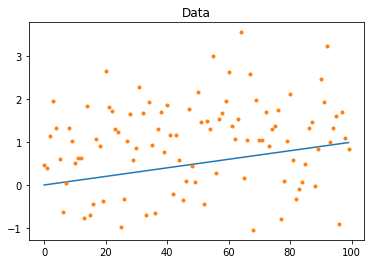

In [3]:
plt.plot(x)
plt.plot(y, '.')
plt.title('Data')

In [4]:
def loss_linear(a, x_=x, y_=y):
    a, b = a
    return sum([((a * x_[i] + b) - y_[i])**2 for i in range(len(x_))])

def loss_rational(a, x_=x, y_=y):
    a, b = a
    return sum([(a / (1 + b * x_[i]) - y_[i])**2 for i in range(len(x_))])

# Gradient descent

In [75]:
a = 2
b = 2
ab_0 = [a, b]
ab_i= [[1, 1], ab_0]
beta_i = []
grad_i = [[0.1, 0.1]]

i=1
while abs(ab_i[i][0] - ab_i[i-1][0]) > 0.001 and abs(ab_i[i][1] - ab_i[i-1][1]) > 0.001:
    grad = [(np.sum(2 * x * (ab_i[i][0] * x + ab_i[i][1] - y)))/len(x), (np.sum(2 * (ab_i[i][0] * x + ab_i[i][1] - y)))/len(x)]
    grad_i.append(grad)
    beta = abs((np.array(ab_i[i])-np.array(ab_i[i-1]))*(np.array(grad_i[i])-np.array(grad_i[i-1])))/(abs(np.array(grad_i[i])-np.array(grad_i[i-1])))**2
    beta_i.append(beta.tolist())
    x_next = np.array(ab_i[i]) - beta_i[i-1] * np.array(grad_i[i])
    ab_i.append(x_next.tolist())
    i += 1
gd_lin = ab_i[i]
print(gd_lin, i)

[0.4987240352682707, 0.7350448070366243] 8


In [76]:
loss_linear(gd_lin)

94.42520473705885

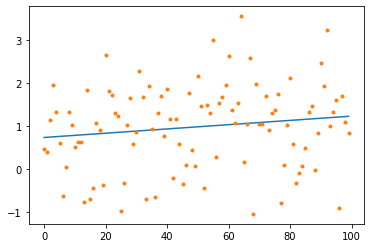

In [77]:
plt.plot(gd_lin[0] * x + gd_lin[1])
plt.plot(y, '.')

In [83]:
a = 6
b = -0.3
ab_0 = [a, b]
ab_i= [[1, -0.5], ab_0]
beta_i = []
grad_i = [[0.01, 0.01]]

i=1
while abs(ab_i[i][0] - ab_i[i-1][0]) > 0.001 and abs(ab_i[i][1] - ab_i[i-1][1]) > 0.001:
    grad = [(np.sum((ab_i[i][0]/(1+ab_i[i][1]*x)-y)*2/(1+ab_i[i][1]*x)))/len(x), (np.sum(2*ab_i[i][0]*x/(1+ab_i[i][1]*x)**2*(ab_i[i][0]/(1+ab_i[i][1]*x)-y)))/len(x)]
    grad_i.append(grad)
    beta = abs((np.array(ab_i[i])-np.array(ab_i[i-1]))*(np.array(grad_i[i])-np.array(grad_i[i-1])))/(abs(np.array(grad_i[i])-np.array(grad_i[i-1])))**2
    beta_i.append(beta.tolist())
    x_next = np.array(ab_i[i]) - beta_i[i-1] * np.array(grad_i[i])
    ab_i.append(x_next.tolist())
    i += 1
gd_rat = ab_i[i]
print(gd_rat, i)

[0.6993349825673923, -0.5036490875249459] 4


In [69]:
loss_rational(gd_rat)

95.39854664117942

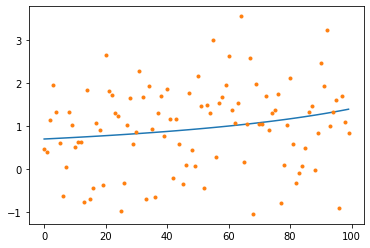

In [70]:
plt.plot(gd_rat[0]/ (1+ gd_rat[1]*x))
plt.plot(y, '.')

# Conjugate descent

In [23]:
x0 = np.array([1,1])
cg_lin = minimize(loss_linear, x0, method='CG', options={'disp':True})

Optimization terminated successfully.
         Current function value: 94.423449
         Iterations: 2
         Function evaluations: 15
         Gradient evaluations: 5


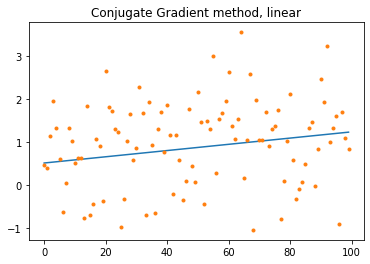

In [84]:
plt.plot(cg_lin.x[1]*x+cg_lin.x[0])
plt.title('Conjugate Gradient method, linear')
plt.plot(y, '.')

In [25]:
x0 = np.array([1,1])
cg_rat = minimize(loss_rational, x0, method='CG', options={'disp':True})
cg_rat.x

Optimization terminated successfully.
         Current function value: 94.754845
         Iterations: 12
         Function evaluations: 87
         Gradient evaluations: 29


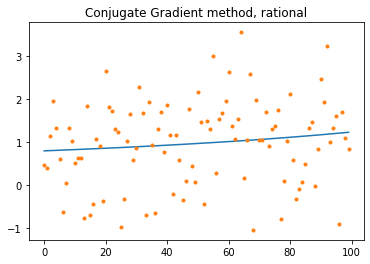

In [26]:
plt.plot(cg_rat.x[0] / (1+ cg_rat.x[1] * x))
plt.plot(y, '.')
plt.title('Conjugate Gradient method, rational')

# Newton's method

In [27]:
x0 = np.array([1,1])
fprime = lambda xx: optimize.approx_fprime(xx, loss_linear, 0.001)
newton_lin = optimize.minimize(loss_linear, x0, method='Newton-CG', tol=0.001, jac=fprime, options={'disp':True})

Optimization terminated successfully.
         Current function value: 94.423482
         Iterations: 3
         Function evaluations: 4
         Gradient evaluations: 13
         Hessian evaluations: 0


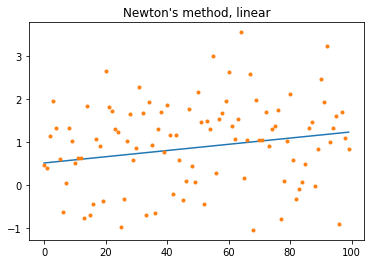

In [85]:
plt.plot(newton_lin.x[1] *x + newton_lin.x[0])
plt.plot(y, '.')
plt.title("Newton's method, linear")

In [29]:
x0 = np.array([1,1])
fprime = lambda xx: optimize.approx_fprime(xx, loss_rational, 0.01)
newton_rat = optimize.minimize(loss_rational, x0, method='Newton-CG', tol=0.001, jac=fprime, options={'disp':True})

         Current function value: 94.755318
         Iterations: 9
         Function evaluations: 37
         Gradient evaluations: 53
         Hessian evaluations: 0


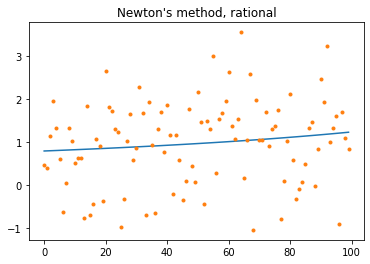

In [30]:
plt.plot(newton_rat.x[0] / (1+ newton_rat.x[1]*x))
plt.plot(y, '.')
plt.title("Newton's method, rational")

# Levenberg Marquardt

In [31]:
def linear(a, x_=x, y_=y):
    a, b = a
    return np.array([(a * x_[i] + b) - y_[i] for i in range(100)]).squeeze()

In [79]:
x0 = np.array([1, 1])
lm_linear = optimize.least_squares(linear, x0, method='lm', verbose=1)

`gtol` termination condition is satisfied.
Function evaluations 6, initial cost 6.1418e+01, final cost 4.7212e+01, first-order optimality 1.04e-07.


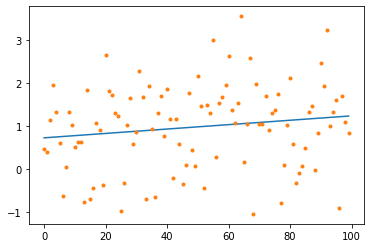

In [80]:
plt.plot(lm_linear.x[0]*x+lm_linear.x[1])
plt.plot(y, '.')

In [34]:
def rational(a, x_=x, y_=y):
    a, b = a
    return np.array([(a / (1 + b * x_[i]) - y_[i])**2 for i in range(len(x_))]).squeeze()
x0 = np.array([1,1])
lm_rational = optimize.least_squares(rational, x0, method='lm', verbose=1, xtol=0.001, ftol=0.001)

`ftol` termination condition is satisfied.
Function evaluations 23, initial cost 1.6858e+02, final cost 1.2094e+02, first-order optimality 2.42e+00.


In [45]:
loss_rational(lm_rational.x)

94.87906112646021

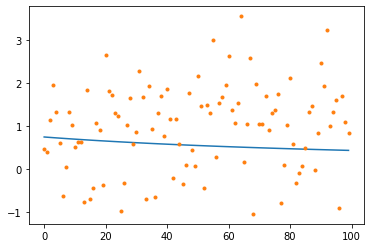

In [35]:
plt.plot(lm_rational.x[0] / (1+lm_linear.x[1]*x))
plt.plot(y, '.')

# all

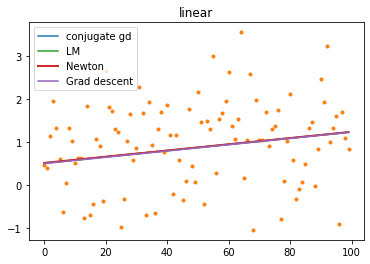

In [86]:
plt.plot(cg_lin.x[0] + cg_lin.x[1] * x, label='conjugate gd')
plt.plot(y, '.')

plt.plot(lm_linear.x[0] + lm_linear.x[1]*x, label='LM')
plt.plot(newton_lin.x[0] + newton_lin.x[1]*x, label='Newton', linewidth=2)
plt.plot(gd_lin[1] * x + gd_lin[0], label='Grad descent')


plt.title("linear")
plt.legend()

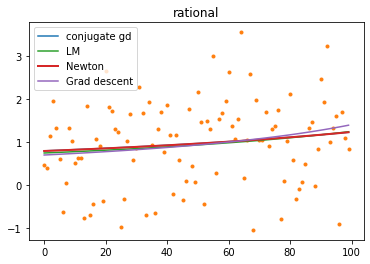

In [72]:
plt.plot(cg_rat.x[0] / (1+ cg_rat.x[1] * x), label='conjugate gd')
plt.plot(y, '.')

plt.plot(lm_rational.x[0] / (1+lm_rational.x[1]*x), label='LM')
plt.plot(newton_rat.x[0] / (1+ newton_rat.x[1]*x), label='Newton', linewidth=2)
plt.plot(gd_rat[0] / (1+ x * gd_rat[1]), label='Grad descent')


plt.title("rational")
plt.legend()